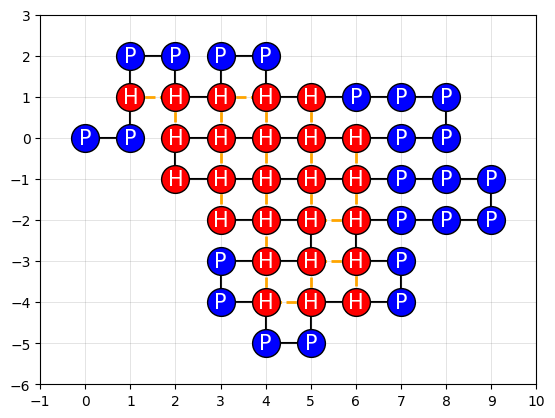

In [1]:
import math
import matplotlib.pyplot as plt

array = [[0, 0], [1, 0], [1, 1], [1, 2], [2, 2], [2, 1], [3, 1], [3, 2], [4, 2], [4, 1], [5, 1], [6, 1], [7, 1], [8, 1], [8, 0], [7, 0], [6, 0], [5, 0], [4, 0], [3, 0], [2, 0], [2, -1], [3, -1], [4, -1], [5, -1], [6, -1], [7, -1], [8, -1], [9, -1], [9, -2], [8, -2], [7, -2], [6, -2], [6, -3], [7, -3], [7, -4], [6, -4], [5, -4], [5, -5], [4, -5], [4, -4], [3, -4], [3, -3], [4, -3], [5, -3], [5, -2], [4, -2], [3, -2]]

hp = "PPHPPHHPPHHPPPPPHHHHHHHHHHPPPPPPHHPPHHPPHPPHHHHH"

# 1) ベースとなる黒線
for i in range(len(array) - 1):
    plt.plot(
        [array[i][0], array[i+1][0]],
        [array[i][1], array[i+1][1]],
        'k-',
        zorder=1
    )

# 2) H同士で距離が1かつ隣り合っていない場合をオレンジ点線で接続
for i in range(len(array)):
    if hp[i] == 'H':
        for j in range(i+1, len(array)):
            if hp[j] == 'H' and j != i + 1:
                dx = array[i][0] - array[j][0]
                dy = array[i][1] - array[j][1]
                dist = math.sqrt(dx*dx + dy*dy)
                if abs(dist - 1.0) < 1e-9:
                    plt.plot(
                        [array[i][0], array[j][0]],
                        [array[i][1], array[j][1]],
                        linestyle='--',
                        color='orange',
                        linewidth=2,
                        zorder=2
                    )

# 3) 丸と文字を最前面に
for i in range(len(array)):
    color = 'red' if hp[i] == 'H' else 'blue'
    plt.plot(
        array[i][0],
        array[i][1],
        marker='o',
        markersize=20,
        markerfacecolor=color,
        markeredgecolor='black',
        zorder=3
    )
    plt.text(
        array[i][0],
        array[i][1],
        hp[i],
        fontsize=15,
        ha='center',
        va='center',
        color='white',
        zorder=4
    )

x_vals = [p[0] for p in array]
y_vals = [p[1] for p in array]
x_min, x_max = min(x_vals), max(x_vals)
y_min, y_max = min(y_vals), max(y_vals)

plt.xticks(range(x_min - 1, x_max + 2))
plt.yticks(range(y_min - 1, y_max + 2))
plt.xlim(x_min - 1, x_max + 1)
plt.ylim(y_min - 1, y_max + 1)

# グリッドを薄く
plt.grid(True, color='gray', alpha=0.3, linewidth=0.5)

plt.show()

In [3]:
%pip install plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 36.6 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
# 必要なライブラリをインポート
import plotly.graph_objects as go
import math

# 3D座標データとHP情報
# array_3d = [
#     [0, 0, 0], [-1, 0, 0], [-1, -1, 0], [-1, -1, -1], [-2, -1, -1], 
#     [-2, -1, 0], [-2, -1, 1], [-2, -1, 2], [-1, -1, 2], [-1, 0, 2], 
#     [0, 0, 2], [0, 0, 1], [0, -1, 1], [0, -1, 0], [0, -2, 0], 
#     [1, -2, 0], [1, -2, 1], [0, -2, 1], [-1, -2, 1], [-1, -1, 1]
# ]
# hp_3d = "HPHPPHHPHPPHPHHPPHPH"

array_3d = [[0, 0, 0], [0, -1, 0], [1, -1, 0], [2, -1, 0], [3, -1, 0], [4, -1, 0], [4, 0, 0], [4, 1, 0], [5, 1, 0], [5, 0, 0], [5, -1, 0], [6, -1, 0], [7, -1, 0], [8, -1, 0], [9, -1, 0], [9, 0, 0], [10, 0, 0], [10, 1, 0], [10, 2, 0], [10, 3, 0], [10, 4, 0], [11, 4, 0], [11, 4, -1], [11, 4, -2], [11, 4, -3], [11, 4, -4], [11, 4, -5], [11, 4, -6], [11, 3, -6], [11, 3, -5], [11, 3, -4], [11, 3, -3], [11, 3, -2], [11, 3, -1], [11, 3, 0], [11, 2, 0], [11, 2, -1], [11, 2, -2], [11, 2, -3], [11, 2, -4], [12, 2, -4], [13, 2, -4], [13, 3, -4], [13, 4, -4], [13, 5, -4], [12, 5, -4], [12, 5, -3], [12, 4, -3]]
hp_3d="PPHPPHHPPHHPPPPPHHHHHHHHHHPPPPPPHHPPHHPPHPPHHHHH"
# 平行移動量を計算
min_x = min(p[0] for p in array_3d)
min_y = min(p[1] for p in array_3d)
min_z = min(p[2] for p in array_3d)

# 平行移動
array_3d = [[x - min_x+1, y - min_y+1, z - min_z+1] for x, y, z in array_3d]

# Figureの準備
fig = go.Figure()

# 1) 隣同士を黒線で接続
for i in range(len(array_3d) - 1):
    fig.add_trace(go.Scatter3d(
        x=[array_3d[i][0], array_3d[i+1][0]],
        y=[array_3d[i][1], array_3d[i+1][1]],
        z=[array_3d[i][2], array_3d[i+1][2]],
        mode='lines',
        line=dict(color='black', width=4),
        showlegend=False
    ))

# 2) H同士で距離が1、かつ隣接でない場合をオレンジ点線で接続
for i in range(len(array_3d)):
    if hp_3d[i] == 'H':
        for j in range(i+1, len(array_3d)):
            if hp_3d[j] == 'H' and j != i + 1:
                dx = array_3d[i][0] - array_3d[j][0]
                dy = array_3d[i][1] - array_3d[j][1]
                dz = array_3d[i][2] - array_3d[j][2]
                dist = math.sqrt(dx*dx + dy*dy + dz*dz)
                if abs(dist - 1.0) < 1e-9:
                    fig.add_trace(go.Scatter3d(
                        x=[array_3d[i][0], array_3d[j][0]],
                        y=[array_3d[i][1], array_3d[j][1]],
                        z=[array_3d[i][2], array_3d[j][2]],
                        mode='lines',
                        line=dict(color='orange', width=2, dash='dash'),
                        showlegend=False
                    ))

# 3) 球状マーカーと文字
for i in range(len(array_3d)):
    color = 'red' if hp_3d[i] == 'H' else 'blue'
    fig.add_trace(go.Scatter3d(
        x=[array_3d[i][0]],
        y=[array_3d[i][1]],
        z=[array_3d[i][2]],
        mode='markers+text',
        marker=dict(size=10, color=color),
        text=hp_3d[i],
        textposition="top center",
        showlegend=False
    ))

# レイアウトの設定
fig.update_layout(
    scene=dict(
        xaxis=dict(nticks=10, range=[0, max(p[0] for p in array_3d) + 1]),
        yaxis=dict(nticks=10, range=[0, max(p[1] for p in array_3d) + 1]),
        zaxis=dict(nticks=10, range=[0, max(p[2] for p in array_3d) + 1]),
    ),
    margin=dict(r=0, l=0, b=0, t=0)
)

fig.show()

ModuleNotFoundError: No module named 'plotly'